<a href="https://colab.research.google.com/github/maitreyee-github/AI-Learning/blob/main/credit_card__Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
print("Numpy: {}".format(np.__version__))
import pandas as pd
print("Pandas: {}".format(pd.__version__))
import matplotlib #
import matplotlib.pyplot as plt
print("matplotlib: {}".format(matplotlib.__version__))
import seaborn as sns
print("seaborn: {}".format(sns.__version__))
import sklearn #
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
print("Scikit-Learn {}".format(sklearn.__version__))
!pip install mlflow
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

# Train your model (example)
# sk_model.fit(x_train, y_train)

# Example input (e.g., a sample row from your training data)
#input_example = x_train[:1]  # Take one row of input as an example

# Infer signature from the input example and the model's prediction
#signature = infer_signature(x_train, sk_model.predict(x_train))

# Log the model with input example and signature
mlflow.sklearn.log_model(
    sk_model,
    "log_reg_model",
    input_example=input_example,
    signature=signature
)

print("MLFlow: {}".format(mlflow.__version__))
import os
import tarfile
import urllib


Numpy: 1.26.4
Pandas: 2.2.2
matplotlib: 3.9.2
seaborn: 0.13.2
Scikit-Learn 1.5.1


NameError: name 'sk_model' is not defined

In [ ]:
data_path = "creditcard.csv"
print(data_path)
df = pd.read_csv(data_path)
df = df.drop("Time", axis=1)
df.head()



creditcard.csv


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
normal = df[df.Class == 0].sample(frac=0.5, random_state=2020).reset_index(drop = True)
print(f"Normal: {normal.shape}")
anomaly = df[df.Class == 1]
print(f"Anomaly: {anomaly.shape}")

Normal: (142158, 30)
Anomaly: (492, 30)


In [ ]:
normal_train, normal_test = train_test_split(normal, test_size = 0.2, random_state = 2020)
anomaly_train, anomaly_test = train_test_split(anomaly, test_size = 0.2, random_state = 2020)

In [ ]:
normal_train, normal_validate = train_test_split(normal_train, test_size = 0.25, random_state = 2020)
anomaly_train, anomaly_validate = train_test_split(anomaly_train, test_size = 0.25, random_state = 2020)

In [ ]:
x_train = pd.concat((normal_train, anomaly_train))
x_test = pd.concat((normal_test, anomaly_test))
x_validate = pd.concat((normal_validate, anomaly_validate))

y_train = np.array(x_train["Class"])
y_test = np.array(x_test["Class"])
y_validate = np.array(x_validate["Class"])

x_train = x_train.drop("Class", axis=1)
x_test = x_test.drop("Class", axis=1)
x_validate = x_validate.drop("Class", axis=1)


print("Training Sets: \nx_train: {} \ny_train: {}".format(x_train.shape, y_train.shape))
print("\nTesting Sets: \nx_test: {} \ny_test: {}".format(x_test.shape, y_test.shape))
print("\nValidation Sets: \nx_validate: {} \ny_validate: {}".format(x_validate.shape, y_validate.shape))



Training Sets: 
x_train: (85588, 29) 
y_train: (85588,)

Testing Sets: 
x_test: (28531, 29) 
y_test: (28531,)

Validation Sets: 
x_validate: (28531, 29) 
y_validate: (28531,)


In [ ]:
def train(sk_model, x_train, y_train):
    sk_model = sk_model.fit(x_train, y_train)
    # Example input (e.g., a sample row from your training data)
    input_example = x_train[:1]
    print(input_example)

    train_acc = sk_model.score(x_train, y_train)
    mlflow.log_metric("train_acc", train_acc)
    print(f"Train Accuracy: {train_acc:.3%}")



In [ ]:
def evaluate(sk_model, x_train, y_train):
    eval_acc = sk_model.score(x_test, y_test)
    preds = sk_model.predict(x_test)
    # Infer signature from the input example and the model's prediction
    signature = infer_signature(x_train, sk_model.predict(x_train))
    auc_score = roc_auc_score(y_test, preds)
    mlflow.log_metric("eval_acc", eval_acc)
    mlflow.log_metric("auc_score", auc_score)
    print(f"Auc Score: {auc_score:.3%}")
    roc_plot = RocCurveDisplay.from_estimator(sk_model, x_test, y_test, name='Scikit-Learn ROC Curve')
    plt.savefig("sklearn_roc_plot.png")
    plt.show()
    plt.clf()
    conf_matrix = confusion_matrix(y_test, preds)
    ax = sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='coolwarm')
    ax.invert_xaxis()
    ax.invert_yaxis()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("Confusion Matrix")
    plt.savefig("sklearn_conf_matrix.png")
    mlflow.log_artifact("sklearn_roc_plot.png")
    mlflow.log_artifact("sklearn_conf_matrix.png")



             V1        V2        V3        V4        V5        V6        V7  \
73530  0.625714 -0.756745 -0.207026  1.573003 -0.430353 -0.324872  0.507153   

             V8        V9       V10  ...       V20      V21       V22  \
73530 -0.071852  0.286757 -0.133331  ...  0.286965  0.15058 -0.127345   

            V23       V24       V25       V26       V27       V28  Amount  
73530 -0.355638  0.068798  0.597708 -0.256959 -0.041794  0.057961   298.4  

[1 rows x 29 columns]
Train Accuracy: 99.893%
Auc Score: 85.341%


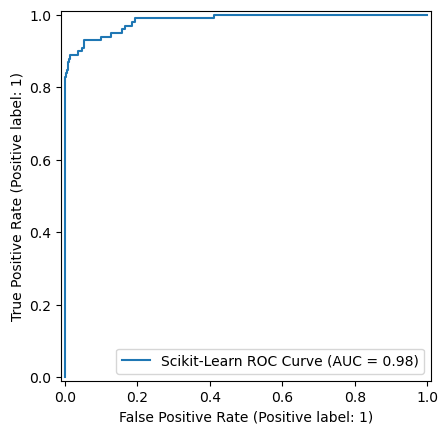

2024/11/20 09:04:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Run:  78ddbbf9970d421498d1ee927bf848ae


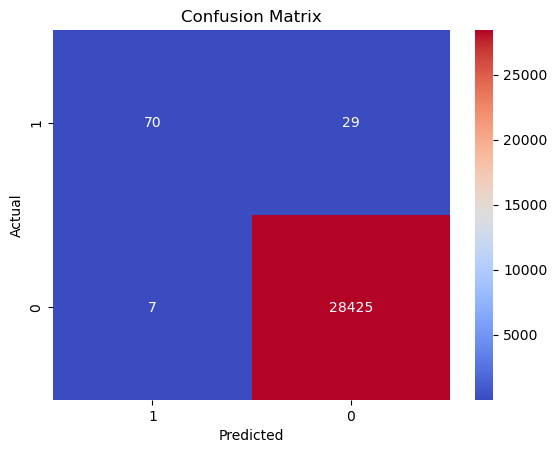

In [ ]:
sk_model = LogisticRegression(random_state=None, max_iter=400, solver='newton-cg')
mlflow.set_experiment("Scikit_Learn_experiment")
with mlflow.start_run():
    train(sk_model, x_train, y_train)
    evaluate(sk_model, x_test, y_test)
    # Log the model with input example and signature
    #mlflow.sklearn.log_model(sk_model, "log_reg_model", input_example=input_example, signature=signature)
    #mlflow.sklearn.log_model(sk_model, "log_reg_model", signature=signature)
    mlflow.sklearn.log_model(sk_model, "log_reg_model")
    print("Model Run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()